In [ ]:
import pandas as pd
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import joblib

# Lokasi file data yang sudah diproses (sesuaikan jika berbeda)
supervised_data_path = '../data/supervised_ready_data.csv'

# Lokasi untuk menyimpan model
model_output_dir = '../models/'
import os
os.makedirs(model_output_dir, exist_ok=True)

print("Memuat data yang sudah diproses...")
try:
    df_supervised = pd.read_csv(supervised_data_path)
    print(f"Data supervised dimuat. Ukuran: {df_supervised.shape}")
except FileNotFoundError:
    print("Error: Salah satu atau kedua file data tidak ditemukan. Pastikan Anda sudah menjalankan script preprocessing dengan benar.")
    exit() 

Memuat data yang sudah diproses...
Data supervised dimuat. Ukuran: (558837, 77)



--- 🧠 Model Supervised: Prediksi Harga Jual ---
Ukuran data pelatihan (X_train_reg): (447069, 76)
Ukuran data pengujian (X_test_reg): (111768, 76)

Melatih Random Forest Regressor dengan pembatasan kedalaman pohon...
Pelatihan Random Forest Regressor selesai.

Evaluasi Model Random Forest Regressor:
Mean Absolute Error (MAE): $956.28
Root Mean Squared Error (RMSE): $1,517.69
R-squared (R2): 0.9754


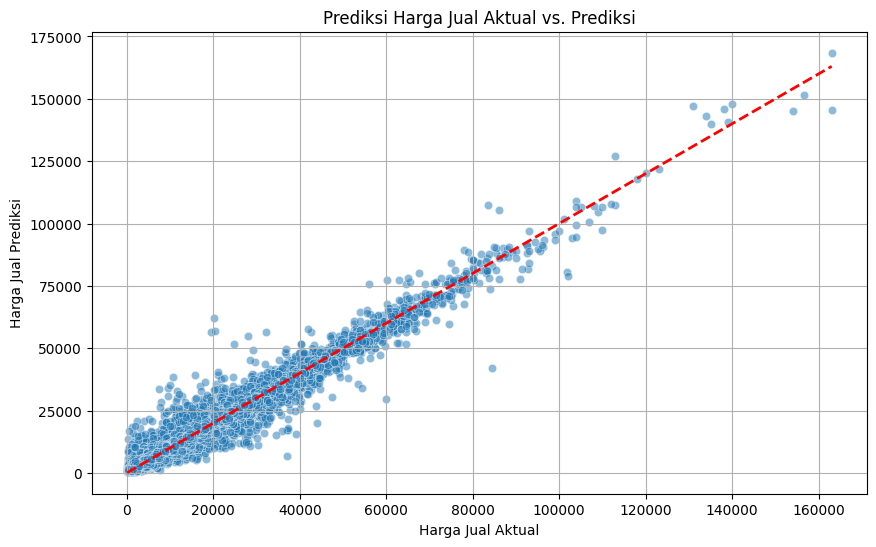

Model Random Forest Regressor disimpan ke '../models/random_forest_regressor_optimized.pkl'


In [ ]:
print("\n--- 🧠 Model Supervised: Prediksi Harga Jual ---")

# Pisahkan fitur (X) dan target (y)
X_reg = df_supervised.drop('sellingprice', axis=1)
y_reg = df_supervised['sellingprice']

# Bagi data menjadi set pelatihan dan pengujian
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Ukuran data pelatihan (X_train_reg): {X_train_reg.shape}")
print(f"Ukuran data pengujian (X_test_reg): {X_test_reg.shape}")

# Inisialisasi dan latih model Random Forest Regressor
print("\nMelatih Random Forest Regressor dengan pembatasan kedalaman pohon...")
# Coba dengan max_depth=10, lalu eksperimen dengan nilai lain (misal 5, 15, 20)
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train_reg, y_train_reg)
print("Pelatihan Random Forest Regressor selesai.")

# Membuat prediksi pada data pengujian
y_pred_reg = rf_regressor.predict(X_test_reg)

# Evaluasi model
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"\nEvaluasi Model Random Forest Regressor:")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R2): {r2:.4f}")

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.title('Prediksi Harga Jual Aktual vs. Prediksi')
plt.xlabel('Harga Jual Aktual')
plt.ylabel('Harga Jual Prediksi')
plt.grid(True)
plt.show()

# --- Menyimpan Model Regresi ---
model_filename_reg = os.path.join(model_output_dir, 'random_forest_regressor_optimized.pkl')
joblib.dump(rf_regressor, model_filename_reg)
print(f"Model Random Forest Regressor disimpan ke '{model_filename_reg}'")